# KLASIFIKASI KANKER PARU - PARU menggunakan Lung Cancer Dataset

Nama : Alfendo Rizky Syachputra

NIM  : A11.2019.11918

## 1. Mengumpulkan Data
Dataset yang diambil dari UCI Machine Learning [Link](https://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/)

Keterangan :
- 32 Sampel data dan 57 atribut (fitur)
- Terdapat missing value
- Class label pada atribut pertama

## 2. Menalaah Data
tediri dari:
- load library yang diperlukan
- load dataset
- memberikan nama header dan atributnya
- menaganalisa tipe dan relasi data
- memeberikan laporan ata kesimpulan dari hasil telaah data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**link** : https://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/lung-cancer.data

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/lung-cancer.data'
df = pd.read_csv(url, header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
27,3,0,2,2,1,0,2,2,2,1,...,3,3,2,2,3,2,2,2,2,1
28,3,0,3,2,2,0,2,2,2,1,...,2,2,2,3,1,2,2,2,2,2
29,3,0,2,1,1,0,2,2,1,1,...,2,2,3,2,2,2,2,2,2,1
30,3,0,2,3,2,1,2,2,3,1,...,2,2,2,2,2,2,2,1,2,2
31,3,0,2,3,1,0,2,3,3,1,...,2,2,2,2,2,2,2,2,2,2


In [ ]:
# memberi nama header atribut
df.columns = ['Class', 'fitur1', 'fitur2', 'fitur3', 'fitur4', 'fitur5', 'fitur6', 'fitur7', 'fitur8', 'fitur9',
              'fitur10', 'fitur11', 'fitur12', 'fitur13', 'fitur14', 'fitur15', 'fitur16', 'fitur17', 'fitur18',
              'fitur19', 'fitur20', 'fitur21', 'fitur22', 'fitur23', 'fitur24', 'fitur25', 'fitur26', 'fitur27',
              'fitur28', 'fitur29', 'fitur30', 'fitur31', 'fitur32', 'fitur33', 'fitur34', 'fitur35', 'fitur36',
              'fitur37', 'fitur38', 'fitur39', 'fitur40', 'fitur41', 'fitur42', 'fitur43', 'fitur44', 'fitur45',
              'fitur46', 'fitur47', 'fitur48', 'fitur49', 'fitur50', 'fitur51', 'fitur52', 'fitur53', 'fitur54', 
              'fitur55', 'fitur56']

In [ ]:
df.head(10)

,Class,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,fitur9,...,fitur47,fitur48,fitur49,fitur50,fitur51,fitur52,fitur53,fitur54,fitur55,fitur56
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
5,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
6,1,0,3,2,1,0,3,3,3,1,...,2,2,2,2,1,2,2,2,1,2
7,1,0,2,2,1,0,3,1,3,3,...,2,2,1,2,2,2,2,1,2,2
8,1,0,3,1,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
9,2,0,2,3,2,0,2,2,2,1,...,2,2,2,1,3,2,1,1,2,2


In [ ]:
 # menganalisa tipe dan relasi data
 # melihat tipe dataset
 type(df)

pandas.core.frame.DataFrame

In [ ]:
# melihat ukuran dataset
df.shape

(32, 57)

In [ ]:
# melihat informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    32 non-null     int64 
 1   fitur1   32 non-null     int64 
 2   fitur2   32 non-null     int64 
 3   fitur3   32 non-null     int64 
 4   fitur4   32 non-null     object
 5   fitur5   32 non-null     int64 
 6   fitur6   32 non-null     int64 
 7   fitur7   32 non-null     int64 
 8   fitur8   32 non-null     int64 
 9   fitur9   32 non-null     int64 
 10  fitur10  32 non-null     int64 
 11  fitur11  32 non-null     int64 
 12  fitur12  32 non-null     int64 
 13  fitur13  32 non-null     int64 
 14  fitur14  32 non-null     int64 
 15  fitur15  32 non-null     int64 
 16  fitur16  32 non-null     int64 
 17  fitur17  32 non-null     int64 
 18  fitur18  32 non-null     int64 
 19  fitur19  32 non-null     int64 
 20  fitur20  32 non-null     int64 
 21  fitur21  32 non-null     int64 
 22  fitu

In [ ]:
# melihat distribusi Class (apa saja jenisnya)
df['Class'].unique()

array([1, 2, 3])

In [ ]:
# melihat distribusi Class (jumlah tiap class)
df['Class'].value_counts()

2    13
3    10
1     9
Name: Class, dtype: int64

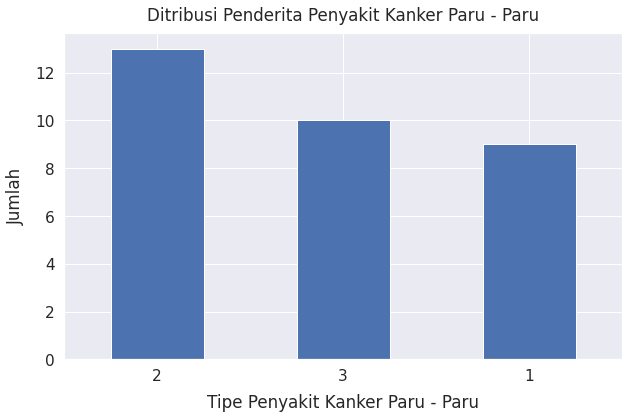

In [ ]:
# melihat distribusi Class (Visualisasi dengan Diagram Batang)
sns.set(font_scale=1.4)
df['Class'].value_counts().plot(kind='bar', figsize=(10,6), rot=0)
plt.xlabel('Tipe Penyakit Kanker Paru - Paru', labelpad=10)
plt.ylabel('Jumlah', labelpad=10)
plt.title('Ditribusi Penderita Penyakit Kanker Paru - Paru', y=1.02)
plt.show()

In [ ]:
# melihat diskripsi statistik dataset
df.describe()

,Class,fitur1,fitur2,fitur3,fitur5,fitur6,fitur7,fitur8,fitur9,fitur10,...,fitur47,fitur48,fitur49,fitur50,fitur51,fitur52,fitur53,fitur54,fitur55,fitur56
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,0.281250,2.187500,2.125000,2.406250,1.156250,1.406250,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.782237,0.176777,0.553581,1.031265,0.456803,0.737804,0.751343,0.756024,0.514899,0.559918,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


## **Kesimpulan :**
- Ada beberpa fitur yang seharusnya bertipe int64, namun tertulis object, berarti ada data yang  hilang (missing value => ?)
- Jumlah fitur ada 57, lebih banyak dibandingkan jumlah record data pasien yang hanya 32. Sehingga masuk ke dalam **High Dimensional Dataset** => Dataset Bertipe Tinggi
- Jumlah distribusi class 1 => 9 pasien, class 2 => 13 pasien, class 3 => 10 pasien


## 3. Memvalidasi Data
terdiri dari :
- Merubah fitur yang mempunyai tanda (?) menjadi nila NaN

In [ ]:
# cek dataframe
df.head()

,Class,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,fitur9,...,fitur47,fitur48,fitur49,fitur50,fitur51,fitur52,fitur53,fitur54,fitur55,fitur56
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [ ]:
# merubah nilai "?" menjadi "NaN" dengan numpy
df.replace("?", np.nan, inplace=True)

In [ ]:
df.head()

,Class,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,fitur9,...,fitur47,fitur48,fitur49,fitur50,fitur51,fitur52,fitur53,fitur54,fitur55,fitur56
0,1,0,3,0,NaN,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [ ]:
# mengecek apakah dataframe terdapat nilai kosong
df.isnull().values.any()

True

In [ ]:
# melihat lokasi pada kolom dataframe yang kosong atau NaN
df.loc[:, df.isnull().any()].columns

Index(['fitur4', 'fitur38'], dtype='object')

In [ ]:
# melihat prenstasi nilai yang kosong
df.loc[:, list(df.loc[:, df.isnull().any()].columns)].isnull().sum()/(len(df))*100

fitur4     12.500
fitur38     3.125
dtype: float64

In [ ]:
# menggunakan replace missing value untuk fitur 4 dan 38
df[['fitur4', 'fitur38']]

,fitur4,fitur38
0,NaN,2
1,1,1
2,2,2
3,2,2
4,1,1
5,2,1
6,1,2
7,1,1
8,1,2
9,2,2


## 4. Menentukan Objek Data
tidak masuk dalam soal

## 5. Membersihkan Data
Strategi pembersihan data :
- Memperbaiki nilai yang hilang
- Menghapus data yang duplicate
- Cek fitur yang bernilai konstant

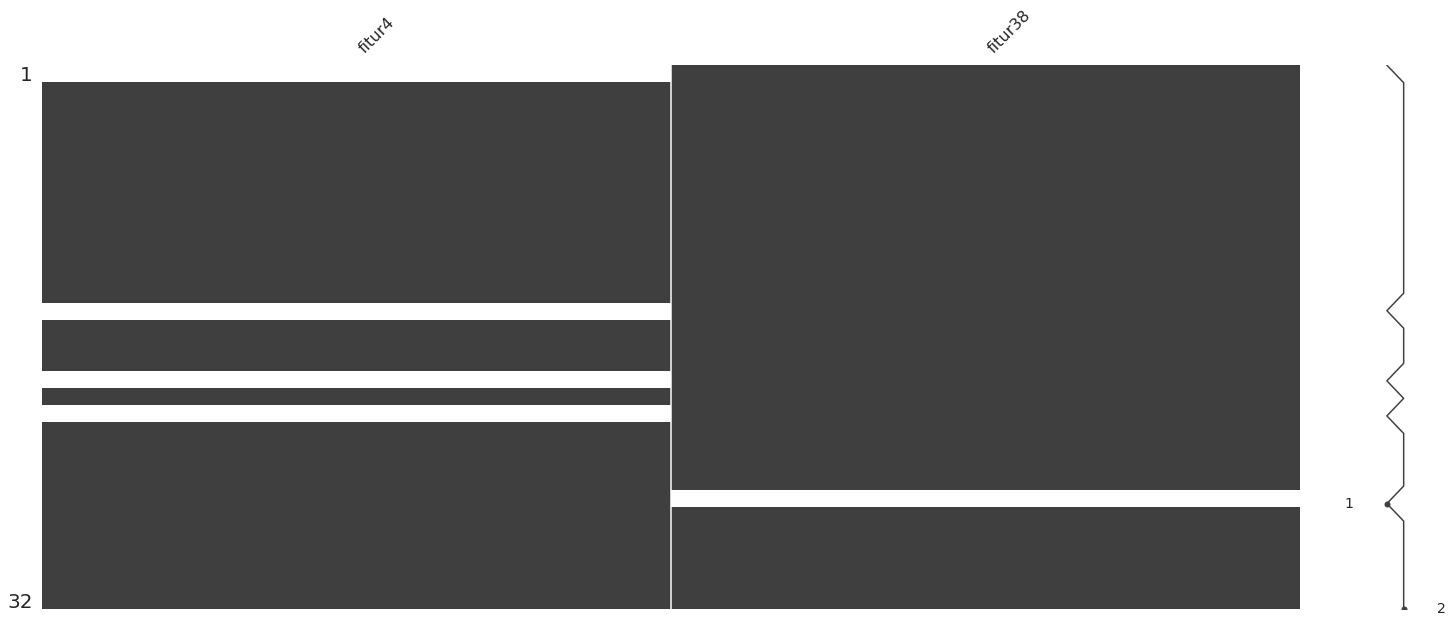

In [ ]:
from numpy.matrixlib.defmatrix import matrix
# memperbaiki nilai yang hilang
md = df.columns[df.isnull().any()].tolist()
missingno.matrix(df[md])

In [ ]:
# memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong
mv = df['fitur4'].median()
df['fitur4'] = df['fitur4'].fillna(mv)

In [ ]:
mev = df['fitur38'].median()
df['fitur38'] = df['fitur38'].fillna(mev)

In [ ]:
# melihat kembali prosentasi dari nilai kosong (NaN) untuk fitur 4 dan fitur 38 setelah dibersihkan
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

Series([], dtype: float64)

In [ ]:
# Menghapus Data Duplikat
# Melihat ukuran baris dan kolom dataframe
df.shape

(32, 57)

In [ ]:
# Menghapus Data Duplikat dan melihat kembali ukuran baris & kolom dataframe
df = df.drop_duplicates()
df.shape

(32, 57)

**Kesimpulan** : Tidak ada data yang sama

In [ ]:
# Menghapus fitur yang bernilai konstant
df = df.loc[:, df.apply(pd.Series.nunique) !=1]

In [ ]:
df.shape

(32, 57)

**Kesimpulan** : Tidak ada fitut yang bernilai konstant

### 6. Mengkonstruksi Data
terdiri dari :
- Representasi fitur dan merubah tipenya. 
- Membagi data menjadi training dan testing. 
- Membandingkan Data Original, Data Normalisasi, Data Original PCA, Data Normalisasi PCA.

In [ ]:
# mengecheck representasi fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    32 non-null     int64 
 1   fitur1   32 non-null     int64 
 2   fitur2   32 non-null     int64 
 3   fitur3   32 non-null     int64 
 4   fitur4   32 non-null     object
 5   fitur5   32 non-null     int64 
 6   fitur6   32 non-null     int64 
 7   fitur7   32 non-null     int64 
 8   fitur8   32 non-null     int64 
 9   fitur9   32 non-null     int64 
 10  fitur10  32 non-null     int64 
 11  fitur11  32 non-null     int64 
 12  fitur12  32 non-null     int64 
 13  fitur13  32 non-null     int64 
 14  fitur14  32 non-null     int64 
 15  fitur15  32 non-null     int64 
 16  fitur16  32 non-null     int64 
 17  fitur17  32 non-null     int64 
 18  fitur18  32 non-null     int64 
 19  fitur19  32 non-null     int64 
 20  fitur20  32 non-null     int64 
 21  fitur21  32 non-null     int64 
 22  fitu

In [ ]:
# mengubah data yang bertipe object menjadi int64
df["fitur38"] = df["fitur38"].astype('int64')
df["fitur4"] = df["fitur4"].astype('int64')

In [ ]:
# cek kembali representasi fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Class    32 non-null     int64
 1   fitur1   32 non-null     int64
 2   fitur2   32 non-null     int64
 3   fitur3   32 non-null     int64
 4   fitur4   32 non-null     int64
 5   fitur5   32 non-null     int64
 6   fitur6   32 non-null     int64
 7   fitur7   32 non-null     int64
 8   fitur8   32 non-null     int64
 9   fitur9   32 non-null     int64
 10  fitur10  32 non-null     int64
 11  fitur11  32 non-null     int64
 12  fitur12  32 non-null     int64
 13  fitur13  32 non-null     int64
 14  fitur14  32 non-null     int64
 15  fitur15  32 non-null     int64
 16  fitur16  32 non-null     int64
 17  fitur17  32 non-null     int64
 18  fitur18  32 non-null     int64
 19  fitur19  32 non-null     int64
 20  fitur20  32 non-null     int64
 21  fitur21  32 non-null     int64
 22  fitur22  32 non-null     int

In [ ]:
# Membagi Training dan Testing
X = df.iloc[:,1:57]
y = df['Class']

In [ ]:
# menampilkan X
X.head()

,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,fitur9,fitur10,...,fitur47,fitur48,fitur49,fitur50,fitur51,fitur52,fitur53,fitur54,fitur55,fitur56
0,0,3,0,1,0,2,2,2,1,1,...,2,2,2,2,2,1,1,1,2,2
1,0,3,3,1,0,3,1,3,1,1,...,2,2,2,2,2,2,2,1,2,2
2,0,3,3,2,0,3,3,3,1,1,...,2,2,2,2,2,2,2,2,1,2
3,0,2,3,2,1,3,3,3,1,2,...,2,2,2,2,2,2,2,2,2,2
4,0,3,2,1,1,3,3,3,2,2,...,2,2,2,2,2,2,2,1,2,2


In [ ]:
# menampilkan y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

### Data Original

In [ ]:
# membagi data menjadi training = 70% dan testing = 30%
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=2022)

In [ ]:
# Menampilkan Data
X_train.head()

,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,fitur9,fitur10,...,fitur47,fitur48,fitur49,fitur50,fitur51,fitur52,fitur53,fitur54,fitur55,fitur56
10,0,2,2,0,0,3,2,3,1,1,...,2,2,2,2,2,2,2,2,2,2
15,0,3,2,2,1,2,2,2,1,1,...,2,2,2,2,2,2,2,2,2,2
26,0,2,2,2,0,2,1,2,1,1,...,2,2,2,2,2,2,2,1,2,1
6,0,3,2,1,0,3,3,3,1,2,...,2,2,2,2,1,2,2,2,1,2
3,0,2,3,2,1,3,3,3,1,2,...,2,2,2,2,2,2,2,2,2,2


### Data Normaliasi

In [ ]:
# Normalisasi menggunakan StandardScaler
scaler = StandardScaler().fit_transform(X)

In [ ]:
# Melihat hasil normalisasi dengan StandardScaler
scaler

array([[-0.1796053 ,  1.14707867, -2.00118448, ..., -1.13389342,
         0.48038446,  0.62554324],
       [-0.1796053 ,  1.14707867,  0.95441106, ..., -1.13389342,
         0.48038446,  0.62554324],
       [-0.1796053 ,  1.14707867,  0.95441106, ...,  0.8819171 ,
        -2.081666  ,  0.62554324],
       ...,
       [-0.1796053 , -0.6882472 , -1.01598597, ...,  0.8819171 ,
         0.48038446, -1.59861051],
       [-0.1796053 , -0.6882472 ,  0.95441106, ..., -1.13389342,
         0.48038446,  0.62554324],
       [-0.1796053 , -0.6882472 ,  0.95441106, ...,  0.8819171 ,
         0.48038446,  0.62554324]])

In [ ]:
X_train_scal, X_test_scal, Y_train_scal, Y_test_scal = train_test_split(scaler,y, test_size=0.3, random_state=2022)

### Data Original PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of Original_PCA:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained Variance Ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of Original_PCA:          0         1         2         3         4         5         6   \
0 -1.057646  2.260422 -1.985713 -0.023184 -0.771633 -0.695836  0.125112   
1 -2.031824  1.281974  1.597589 -1.688171  0.754078  0.411962  0.874224   
2 -1.601070 -1.522187  0.904781  0.490203 -0.237550 -1.095035 -1.915412   
3 -0.841556 -1.738084  0.484309  2.097076  1.255459 -1.088126 -1.547277   
4 -1.464877  0.901017  1.088615  0.745350  1.286815  1.848524  0.612184   

         7         8         9   ...        22        23        24        25  \
0 -0.905445  0.047716  0.917133  ... -0.428479  0.279299 -0.337633 -0.071038   
1  0.978529 -0.735173  0.922356  ...  0.684697  0.374345 -0.275613  0.235054   
2  0.810770 -0.881391 -0.402055  ...  0.282514 -0.292853 -0.377844 -0.128548   
3  0.459730  0.186126 -0.014296  ...  0.096951  0.030326  0.369293 -0.492249   
4 -0.359838  0.014906  0.601446  ...  0.014950  0.401673  0.375134 -0.050496   

         26        27        28        29    

In [ ]:
# Visualisasi Data Original PCA
cum_var_ratio = np.cumsum(var_ratio)

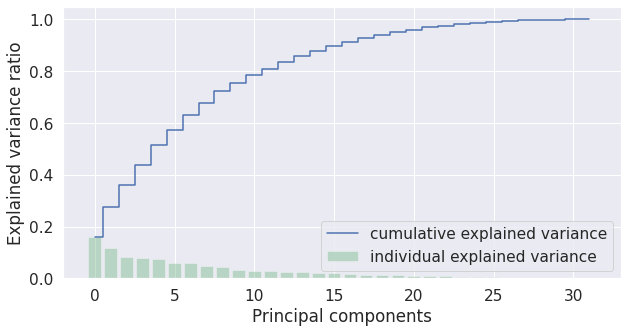

Cumulative explained ratio: [0.15934082 0.27488602 0.35861016 0.43858322 0.51345845 0.57375362
 0.63150817 0.67852622 0.72231158 0.75526378 0.78375031 0.81045975
 0.83410366 0.85690149 0.87763253 0.89707697 0.91413281 0.92768103
 0.93985221 0.9509827  0.96074279 0.96910631 0.97641367 0.982464
 0.98726226 0.99107118 0.99385427 0.99643944 0.99818263 0.99929884
 1.         1.        ]


In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),var_ratio,alpha=0.3333,align='center',label='individual explained variance',color = 'g')
plt.step(range(len(cum_var_ratio)),cum_var_ratio,where='mid',label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()
print("Cumulative explained ratio:",cum_var_ratio)

In [ ]:
# Dipilih 18 PC
pca = PCA(n_components=18, random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])

In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=2022)

### Data Normalisasi PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(scaler)
norm_pca_array = pca.transform(scaler)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of iris_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of iris_pca:          0         1         2         3         4         5         6   \
0 -1.875112 -1.074126 -3.114162 -0.202740 -1.578644  0.472907 -0.306629   
1 -2.228485 -3.085196 -0.355241  0.321562  0.962612  1.183493  1.933027   
2 -2.045345 -0.560281  2.529009  1.166134 -1.090708 -2.418340 -2.856828   
3 -1.232962  0.268831  1.314142 -1.177625  0.699316 -4.038767 -1.566536   
4 -1.185845 -1.218255  0.987464 -2.566320  0.910664  0.388925  1.540951   

         7         8         9   ...        22        23        24        25  \
0  0.744336  0.034727  0.193626  ...  0.801308 -0.131015 -0.279103 -0.296633   
1 -2.332710 -1.001260  0.199715  ...  1.362424 -0.451698 -0.856956  0.210401   
2 -1.527885 -0.540103 -1.621999  ...  0.367649  0.574592 -0.423554  0.428521   
3  1.393874  0.537139  1.077903  ...  0.977745 -0.977776  0.341032  0.467428   
4 -1.405633  0.411415  2.363635  ... -0.411097 -1.176693 -0.084704 -0.818883   

         26        27        28        29        

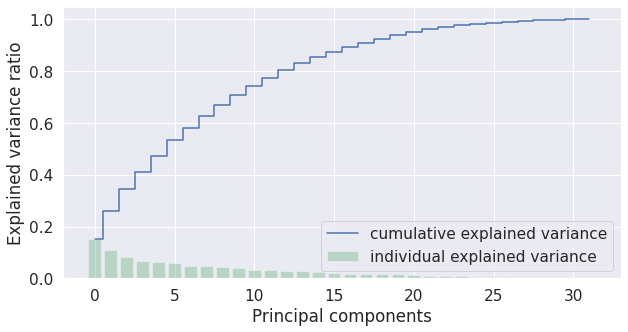

Cumulative explained ratio: [0.1535552  0.26122328 0.34394082 0.41070078 0.473153   0.5327475
 0.58156557 0.6277977  0.66976358 0.7092963  0.74218264 0.77309676
 0.80315311 0.83061478 0.85338857 0.87409626 0.89246191 0.90980393
 0.92587992 0.94098776 0.95339462 0.96261989 0.97051216 0.97757267
 0.98308898 0.98764383 0.99180414 0.99482533 0.99711414 0.9988593
 1.         1.        ]


In [ ]:
# Visualisasi Data Normalisasi PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),var_ratio,alpha=0.3333,align='center',
label='individual explained variance',color = 'g')
plt.step(range(len(cum_var_ratio)),cum_var_ratio,where='mid',
label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()
print("Cumulative explained ratio:",cum_var_ratio)

In [ ]:
# Dipilih 18 PC
pca = PCA(n_components=18, random_state=2022)
pca.fit(scaler)
norm_pca_array = pca.transform(scaler)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])

In [ ]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=2022)

### 7. Menentukan Label Data

- Tidak perlu dikerjakan karena label sudah diputuskan dibagian transformasi data. 
- Merupakan Soal Tertulis.

### 8. Membangun Model

- Teknik Pemodelan yang dipakai: Menggunakan Decision Tree Parameter yang dipakai:
        - [criterion: gini, entropy]
        - [max_depth]
        - [min sample split]
        - [min sample leaf]
- Skenario Pengujian
        - Menggunakan akurasi, presisi dan recall
        - Pengujian menggunakan Data Original
        - Pengujian menggunakan Data yang sudah dinormalisasi
        - Pengujian menggunakan Data Original yang diberikan PCA
        - Pengujian menggunakan Data yang sudah dinormalisasi dan diberikan PCA

### Decision Tree

In [ ]:
# menyiapkan parameter yang digunakan
parameters_dt = {
"model__max_depth": np.arange(1,21),
"model__min_samples_leaf": np.arange(1,101,2),
"model__min_samples_split": np.arange(2,11),
"model__criterion": ['gini','entropy'],
"model__random_state": [2022]
}

### Pemodelan Decision Tree

In [ ]:
# Pemodelan Decision Tree
classifier_dt_pipeline = Pipeline([('model',DecisionTreeClassifier()),])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# pemodelan random forest
clf = RandomForestClassifier(n_estimators=10)

In [ ]:
clf.fit(X_train,Y_train.ravel())

RandomForestClassifier(n_estimators=10)

### Pemodelan dengan Data Original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=1, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


### Pemodelan Decision Tree dengan Data Normalisasi

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_scal,Y_train_scal.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=1, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


### Pemodelan Decision Tree dengan Data Original tapi diberikan PCA

In [ ]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
ori_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=1, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


### Pemodelan Decision Tree dengan Data Normalisasi tapi diberikan PCA

In [ ]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
norm_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=3, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 3
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


### 9. Mengevaluasi Hasil Pemodelan
- Menjadi soal coding

### Evaluasi Dengan Data Original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)
ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)
ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)
ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)
ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)
ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)
ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)
ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.6363636363636364
Precision pada training set:  0.6363636363636364
Recall pada training set:  0.6363636363636364
Akurasi pada test set:  0.5
Precision pada test set:  0.5
Recall pada test set:  0.5


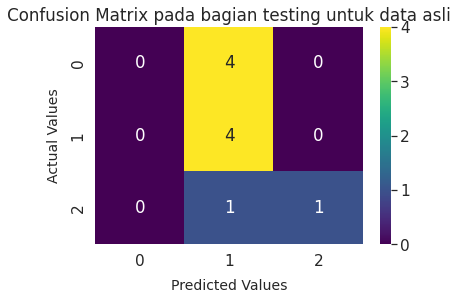

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi dengan Data Normalisasi

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_scal)
norm_accuracy_dt_train = accuracy_score(Y_train_scal,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)
norm_precision_dt_train = precision_score(Y_train_scal,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)
norm_recall_dt_train = recall_score(Y_train_scal,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)
norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_scal)
norm_accuracy_dt_test = accuracy_score(Y_test_scal,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)
norm_precision_dt_test = precision_score(Y_test_scal,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)
norm_recall_dt_test = recall_score(Y_test_scal,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.6363636363636364
Precision pada training set:  0.6363636363636364
Recall pada training set:  0.6363636363636364
Akurasi pada test set:  0.5
Precision pada test set:  0.5
Recall pada test set:  0.5


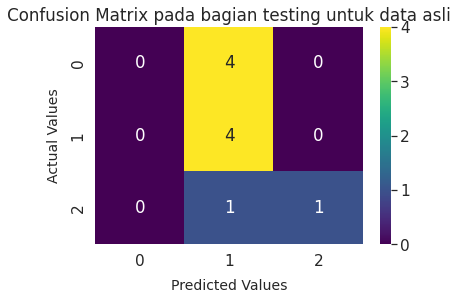

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_scal,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi PCA dengan Data Original

In [ ]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)
ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)
ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)
ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)
ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)
ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)
ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)
ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.6363636363636364
Precision pada training set:  0.6363636363636364
Recall pada training set:  0.6363636363636364
Akurasi pada test set:  0.4
Precision pada test set:  0.4
Recall pada test set:  0.4


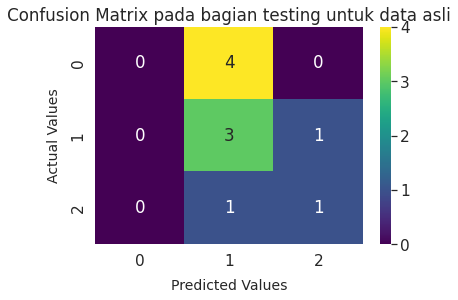

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi Data Normalisasi dengan PCA

In [ ]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)
norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)
norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)
norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)
norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)
norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)
norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)
norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.9090909090909091
Precision pada training set:  0.9090909090909091
Recall pada training set:  0.9090909090909091
Akurasi pada test set:  0.6
Precision pada test set:  0.6
Recall pada test set:  0.6


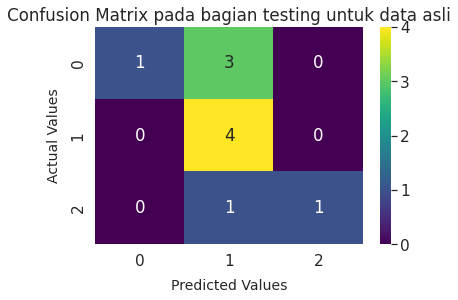

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_norm_pca,norm_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### 10. Melakukan Proses Review Pemodelan

In [ ]:
models = [
('Decision Tree Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
('Decision Tree Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
('Decision Tree PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),
('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),
]

In [ ]:
# Melakukan perbandingan hasil training akurasi dan test akurasi dengan 4 model
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree Data Original,0.636364,0.5
1,Decision Tree Data Normalisasi,0.636364,0.5
2,Decision Tree PCA Data Original,0.636364,0.4
3,Decision Tree PCA Data Normalisasi,0.909091,0.6


In [ ]:
models_comparison = [

('Decision Tree Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
('Decision Tree Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
('Decision Tree PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
]

In [ ]:
# Melakukan perbandingan hasil Akurasi, Presisi dan Recall pada data Testing dengan 4 model
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree Data Original,0.5,0.5,0.5
1,Decision Tree Data Normalisasi,0.5,0.5,0.5
2,Decision Tree PCA Data Original,0.4,0.4,0.4
3,Decision Tree PCA Data Normalisasi,0.6,0.6,0.6


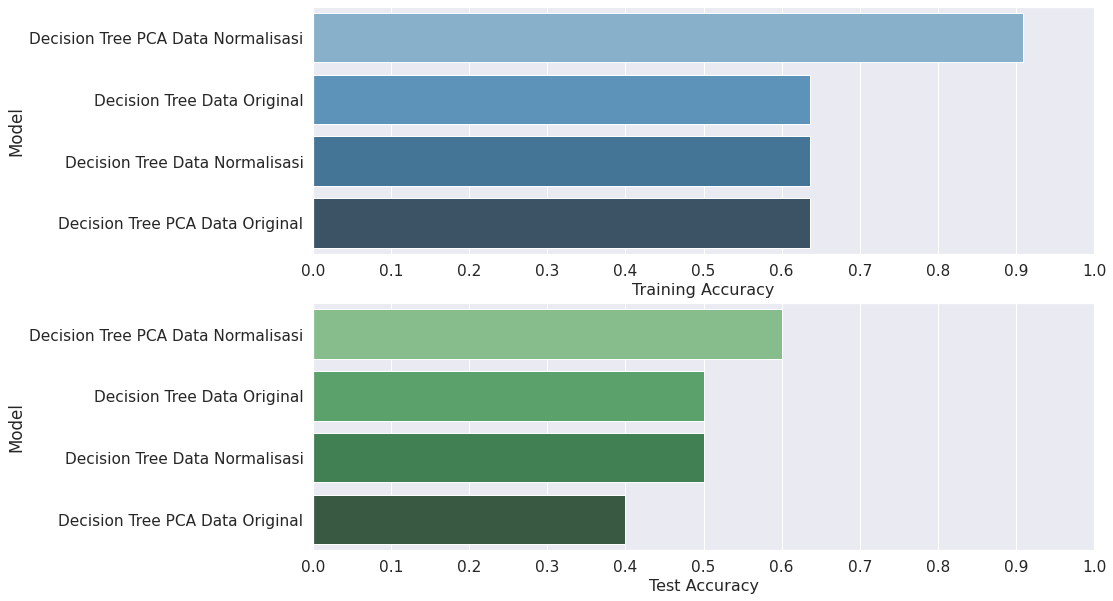

In [ ]:
# Visualisasi Perbandingan 4 model dengan Seaborn
f, axes = plt.subplots(2,1, figsize=(14,10))
predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

### Kesimpulan :
- Model terbaik dari Dataset Kanker Paru-Paru adalah menggunakan Decision Tree PCA Data Normalisasi dengan nilai akurasi tertinggi
pada Data Training sebesar 90,9% dan akurasi tertinggi pada Data Testing sebesar 60%.